In [1]:
# K-mean cluster
#K-means Clustering in Python
#K-means clustering is a clustering algorithm that aims to partition n observations into k clusters.

#There are 3 steps:

#Initialisation – K initial “means” (centroids) are generated at random
#Assignment – K clusters are created by associating each observation with the nearest centroid
#Update – The centroid of the clusters becomes the new mean

In [121]:
import pandas as pd
import numpy as np

df = pd.read_csv('C:\\Users\\HP\\Downloads\cereals.csv')

dfnew = df[['calories',
'protein',
'fat',
'sodium',
'fiber',
'carbo',
'sugars',
'potass',
'vitamins','rating']] 

In [122]:
dfnew.head(5)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,rating
0,70,4,1,130,10.0,5.0,6,280,25,68.402973
1,120,3,5,15,2.0,8.0,8,135,0,33.983679
2,70,4,1,260,9.0,7.0,5,320,25,59.425505
3,50,4,0,140,14.0,8.0,0,330,25,93.704912
4,110,2,2,200,1.0,14.0,8,-1,25,34.384843


In [123]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(dfnew)
y_kmeans = kmeans.predict(dfnew)

In [60]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [75]:
x = dfnew.iloc[:, [0,1, 2, 3, 4,5,6,7,8]].values
y = dfnew.iloc[:,9]
#y
#x
#y =  dataset.iloc[:, [9]].values  - No need of Y ?

0     68.402973
1     33.983679
2     59.425505
3     93.704912
4     34.384843
5     29.509541
6     33.174094
7     37.038562
8     49.120253
9     53.313813
10    18.042851
11    50.764999
12    19.823573
13    40.400208
14    22.736446
15    41.445019
16    45.863324
17    35.782791
18    22.396513
19    40.448772
20    64.533816
21    46.895644
22    36.176196
23    44.330856
24    32.207582
25    31.435973
26    58.345141
27    41.015492
28    28.025765
29    35.252444
        ...    
44    40.105965
45    29.924285
46    40.692320
47    59.642837
48    30.450843
49    37.840594
50    41.503540
51    60.756112
52    63.005645
53    49.511874
54    50.828392
55    39.259197
56    39.703400
57    55.333142
58    41.998933
59    40.560159
60    68.235885
61    74.472949
62    72.801787
63    31.230054
64    53.131324
65    59.363993
66    38.839746
67    28.592785
68    46.658844
69    39.106174
70    27.753301
71    49.787445
72    51.592193
73    36.187559
Name: rating, Length: 74

In [61]:
y_kmeans

array([2, 1, 2, 2, 0, 3, 3, 3, 3, 2, 0, 0, 0, 3, 3, 0, 0, 1, 3, 3, 1, 0,
       3, 3, 3, 0, 1, 2, 3, 1, 0, 3, 3, 1, 0, 0, 3, 3, 3, 0, 3, 3, 1, 3,
       3, 3, 3, 3, 3, 2, 0, 1, 1, 3, 1, 2, 3, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 2, 3, 0, 3, 3, 3, 3])

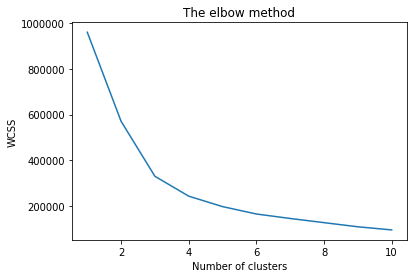

In [44]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [47]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 9, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

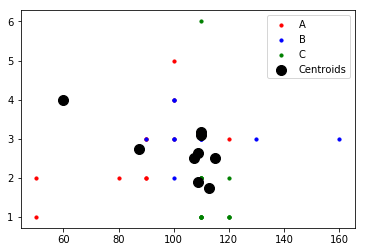

In [50]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 10, c = 'red', label = 'A')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'B')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 10, c = 'green', label = 'C')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')

plt.legend()

In [83]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3).fit(x)

pca_d = pca.transform(x)

#pca_d

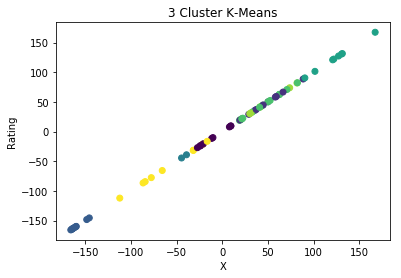

In [84]:
kmeans=KMeans(n_clusters=8)

kmeansoutput=kmeans.fit(x)

kmeansoutput

plt.figure('3 Cluster K-Means')

plt.scatter(pca_d[:, 0], pca_d[:, 0], c=kmeansoutput.labels_)

plt.xlabel('X')

plt.ylabel('Rating')

plt.title('3 Cluster K-Means')

plt.show()

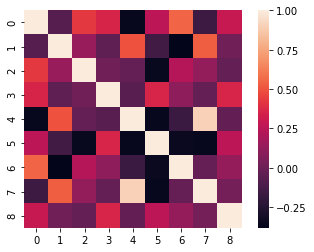

In [92]:
import seaborn as sns
import numpy as np
x = pd.DataFrame(x)
cor = x.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map

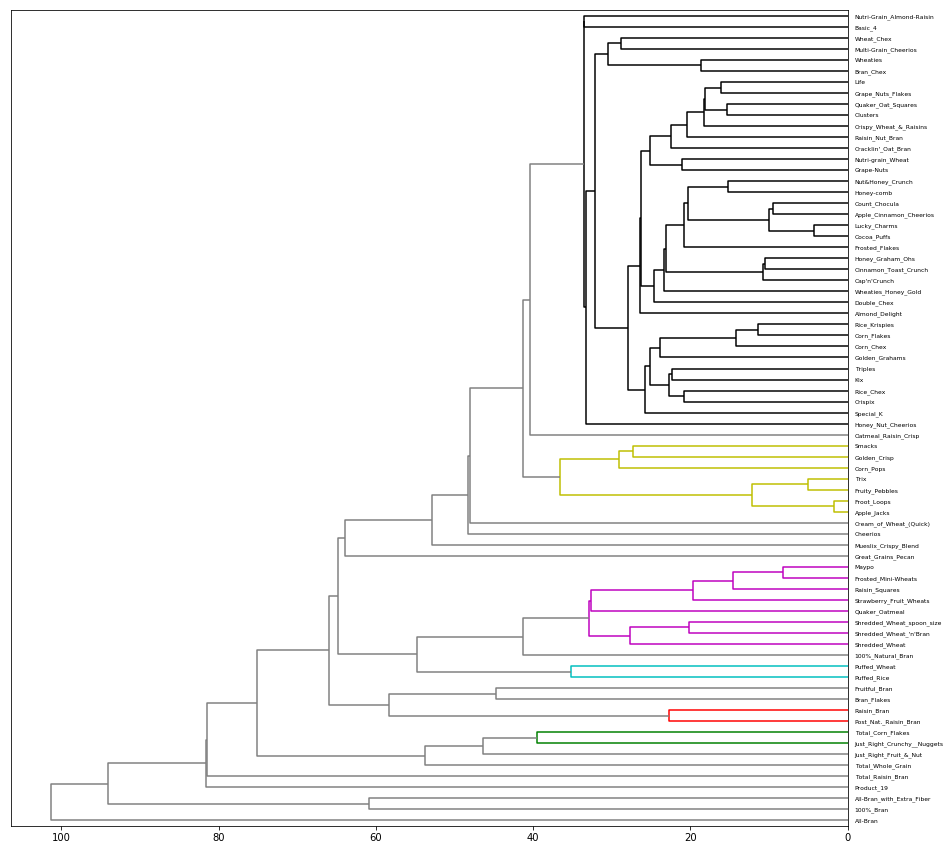

In [130]:
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt

#df = df.set_index('name')
#del df.index.name

linked = linkage(dfnew, 'single')

labelList = range(1, 11)

plt.figure(figsize=(15, 15))  
dendrogram(linked, orientation='left',labels=df.index, color_threshold=40, above_threshold_color='grey')
plt.show()

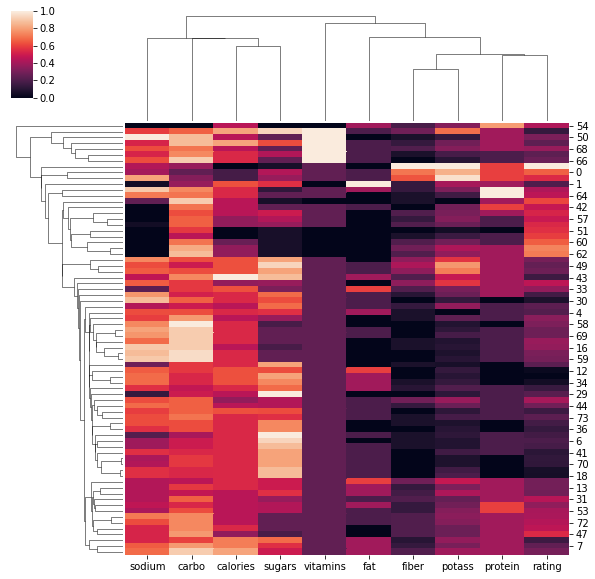

In [132]:
sns.clustermap(dfnew, metric="euclidean", standard_scale=1, method="single")


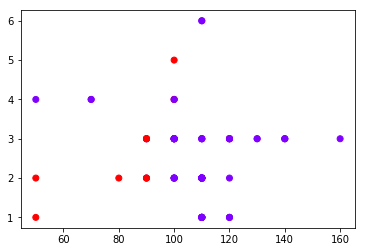

In [131]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(x)
plt.scatter(x.iloc[:,0],x.iloc[:,1], c=cluster.labels_, cmap='rainbow')  